In [9]:
pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.5 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.5 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 57.5/57.5 kB 429.4 kB/s eta 0:00:00
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/02/8c/dc970bc00867fe290e8c8a7befa1635af716a9ebdfe3fb9dce0ca4b522ce/libclang-16.0.6-py2.py3-none-win_amd64.whl.metadata
  Obtaining dependency i

In [10]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [11]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [13]:
X_train.shape

(60000, 28, 28)

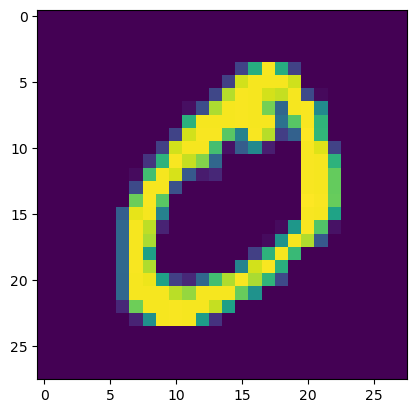

In [15]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [16]:
X_train = X_train/255
X_test = X_test/255

In [18]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [28]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [38]:
history = model.fit(X_train,y_train,epochs=25,validation_split = 0.2)

Epoch 1/25

1500/1500 [==============================] - 12s 6ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.2187 - val_accuracy: 0.9769
Epoch 2/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.2330 - val_accuracy: 0.9769
Epoch 3/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0068 - accuracy: 0.9981 - val_loss: 0.2280 - val_accuracy: 0.9776
Epoch 4/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.2273 - val_accuracy: 0.9783
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.2175 - val_accuracy: 0.9788
Epoch 6/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.2805 - val_accuracy: 0.9747
Epoch 7/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 0.2305 - val_accurac

In [39]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [40]:
y_pred = y_prob.argmax(axis=1)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9775

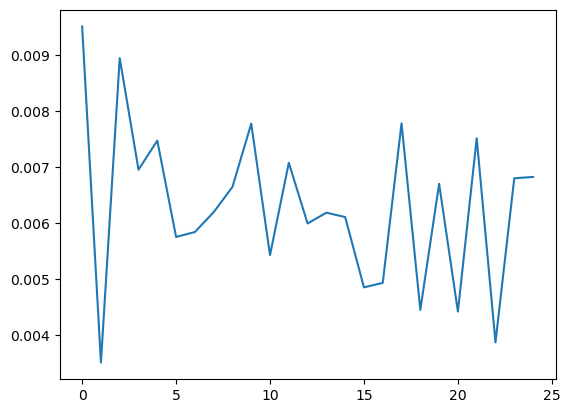

In [35]:
plt.plot(history.history['loss'])

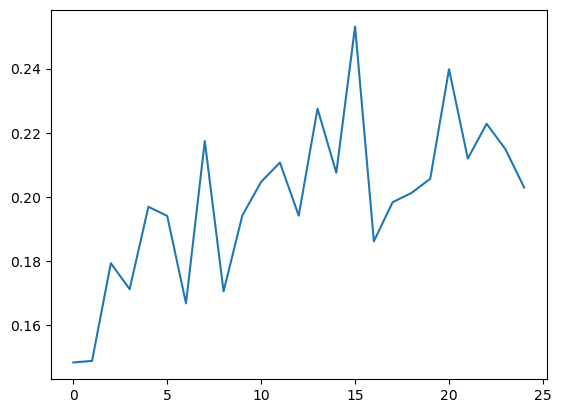

In [36]:
plt.plot(history.history['val_loss'])

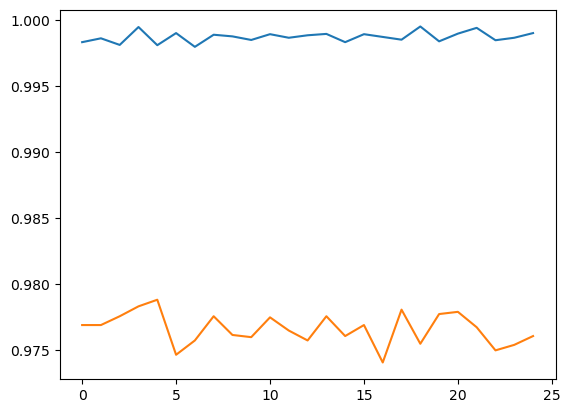

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

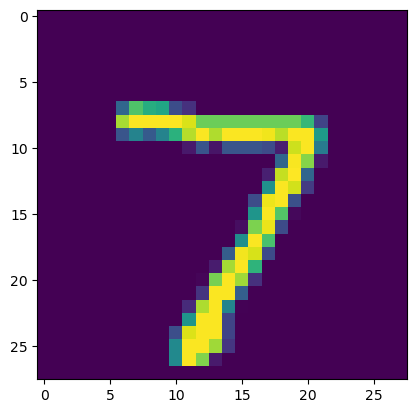

In [43]:
plt.imshow(X_test[0])

In [44]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 410ms/step


array([7], dtype=int64)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
1500/1500 [==============================] - 17s 7ms/step - loss: 0.2764 - accuracy: 0.9186 - val_loss: 0.1438 - val_accuracy: 0.9559
E

array([7], dtype=int64)

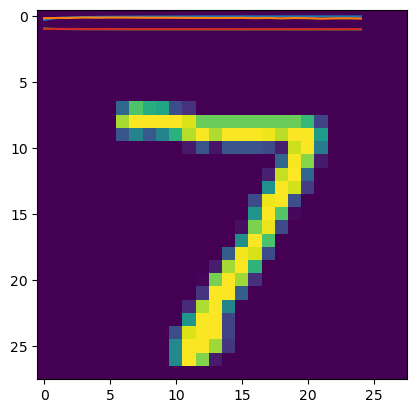

In [45]:
#pip install tensorflow
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

X_train.shape
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

X_train = X_train/255
X_test = X_test/255

X_train[0]
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=25,validation_split = 0.2)

y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.imshow(X_test[0])
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)